# Dataset Exploration - Viola-Jones Face Detector

Exploratory Data Analysis of the Faces94 dataset patches.

**Dataset**: 
- Training: 799 faces + 3,995 non-faces
- Testing: 2,260 faces + 11,300 non-faces
- Patch size: 16×16 pixels

**AI Usage**: Notebook structure assisted by Claude Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Load Dataset

In [2]:
# Load training data
with open('../data/processed/train_faces.pkl', 'rb') as f:
    train_faces = pickle.load(f)

with open('../data/processed/train_nonfaces.pkl', 'rb') as f:
    train_nonfaces = pickle.load(f)

# Load testing data
with open('../data/processed/test_faces.pkl', 'rb') as f:
    test_faces = pickle.load(f)

with open('../data/processed/test_nonfaces.pkl', 'rb') as f:
    test_nonfaces = pickle.load(f)

print("Dataset loaded successfully!")
print(f"Training: {len(train_faces)} faces, {len(train_nonfaces)} non-faces")
print(f"Testing: {len(test_faces)} faces, {len(test_nonfaces)} non-faces")

Dataset loaded successfully!
Training: 799 faces, 3995 non-faces
Testing: 2260 faces, 11300 non-faces


## 2. Dataset Statistics

In [3]:
print("=== Training Set ===")
print(f"Face patches shape: {train_faces.shape}")
print(f"Non-face patches shape: {train_nonfaces.shape}")
print(f"Face pixel range: [{train_faces.min()}, {train_faces.max()}]")
print(f"Non-face pixel range: [{train_nonfaces.min()}, {train_nonfaces.max()}]")
print(f"Face mean intensity: {train_faces.mean():.2f}")
print(f"Non-face mean intensity: {train_nonfaces.mean():.2f}")

print("\n=== Class Balance ===")
total_train = len(train_faces) + len(train_nonfaces)
print(f"Total training patches: {total_train}")
print(f"Face ratio: {len(train_faces)/total_train:.2%}")
print(f"Non-face ratio: {len(train_nonfaces)/total_train:.2%}")
print(f"Imbalance ratio (non-face:face): {len(train_nonfaces)/len(train_faces):.2f}:1")

=== Training Set ===
Face patches shape: (799, 16, 16)
Non-face patches shape: (3995, 16, 16)
Face pixel range: [0, 254]
Non-face pixel range: [0, 254]
Face mean intensity: 106.41
Non-face mean intensity: 78.63

=== Class Balance ===
Total training patches: 4794
Face ratio: 16.67%
Non-face ratio: 83.33%
Imbalance ratio (non-face:face): 5.00:1


## 3. Visualize Sample Patches

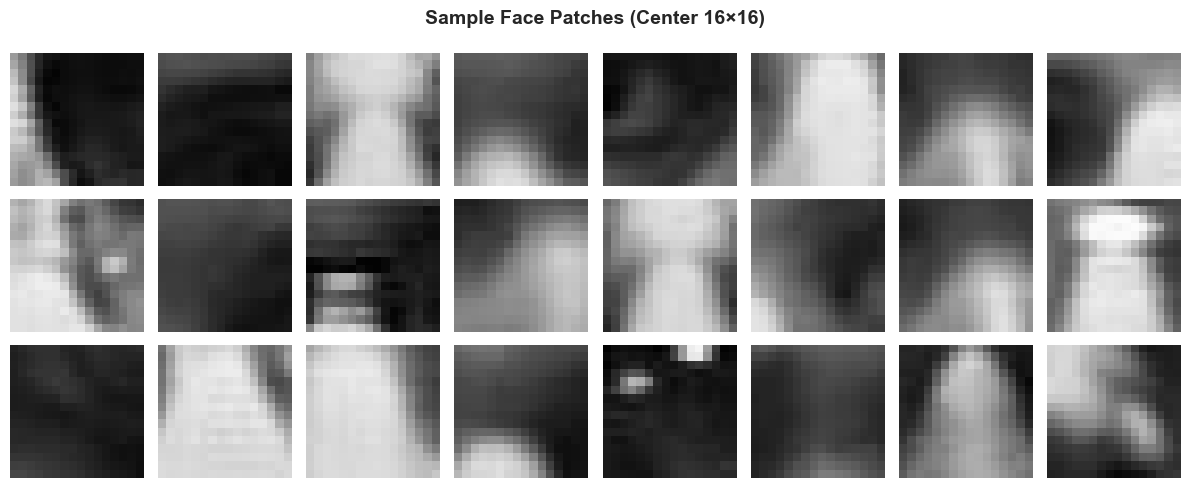

In [4]:
# Visualize face patches
fig, axes = plt.subplots(3, 8, figsize=(12, 5))
fig.suptitle('Sample Face Patches (Center 16×16)', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(train_faces))
    ax.imshow(train_faces[idx], cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

plt.tight_layout()
plt.savefig('../results/figures/sample_face_patches.png', dpi=150, bbox_inches='tight')
plt.show()

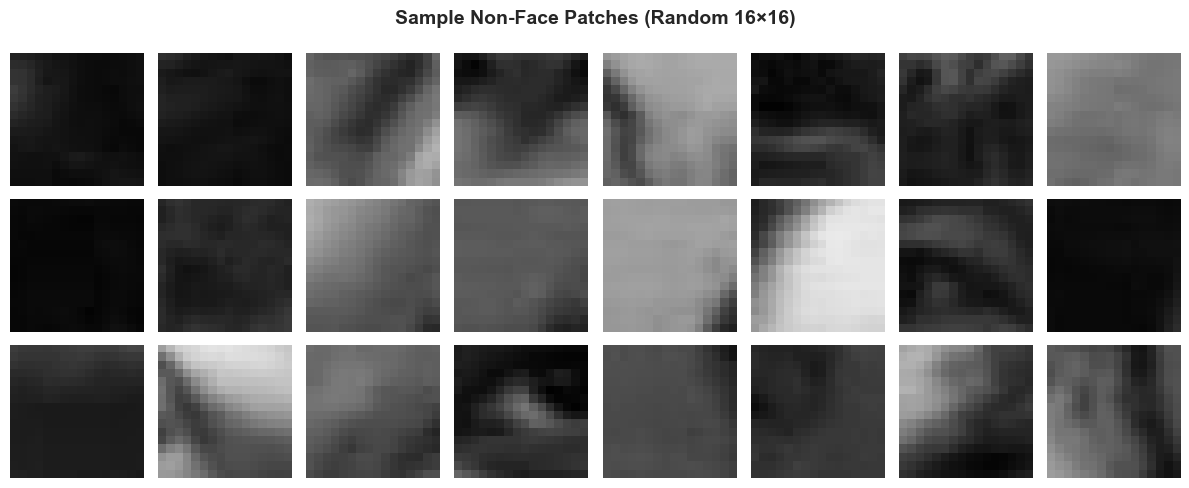

In [5]:
# Visualize non-face patches
fig, axes = plt.subplots(3, 8, figsize=(12, 5))
fig.suptitle('Sample Non-Face Patches (Random 16×16)', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(train_nonfaces))
    ax.imshow(train_nonfaces[idx], cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

plt.tight_layout()
plt.savefig('../results/figures/sample_nonface_patches.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Intensity Distribution Analysis

C:\Users\aksha\AppData\Local\Temp\ipykernel_27452\2864302190.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([face_means, nonface_means], labels=['Face', 'Non-face'], patch_artist=True,


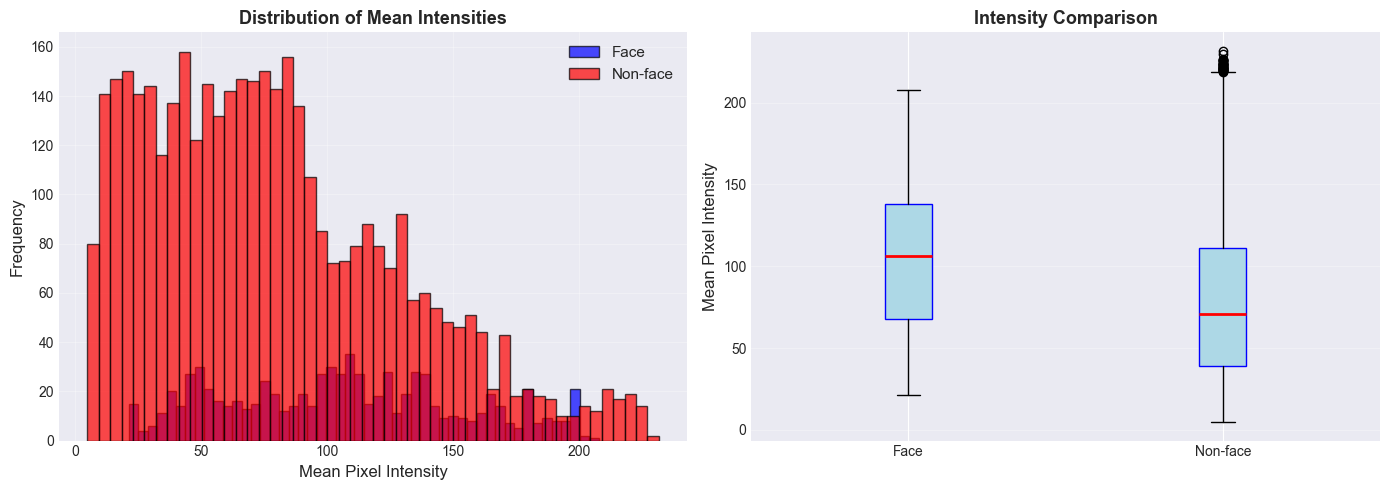

Face patches - Mean: 106.41, Std: 46.67
Non-face patches - Mean: 78.63, Std: 49.72


In [6]:
# Compute mean pixel intensity per patch
face_means = train_faces.mean(axis=(1, 2))
nonface_means = train_nonfaces.mean(axis=(1, 2))

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(face_means, bins=50, alpha=0.7, label='Face', color='blue', edgecolor='black')
axes[0].hist(nonface_means, bins=50, alpha=0.7, label='Non-face', color='red', edgecolor='black')
axes[0].set_xlabel('Mean Pixel Intensity', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Mean Intensities', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot([face_means, nonface_means], labels=['Face', 'Non-face'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Mean Pixel Intensity', fontsize=12)
axes[1].set_title('Intensity Comparison', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/figures/intensity_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Face patches - Mean: {face_means.mean():.2f}, Std: {face_means.std():.2f}")
print(f"Non-face patches - Mean: {nonface_means.mean():.2f}, Std: {nonface_means.std():.2f}")

## 5. Variance Analysis

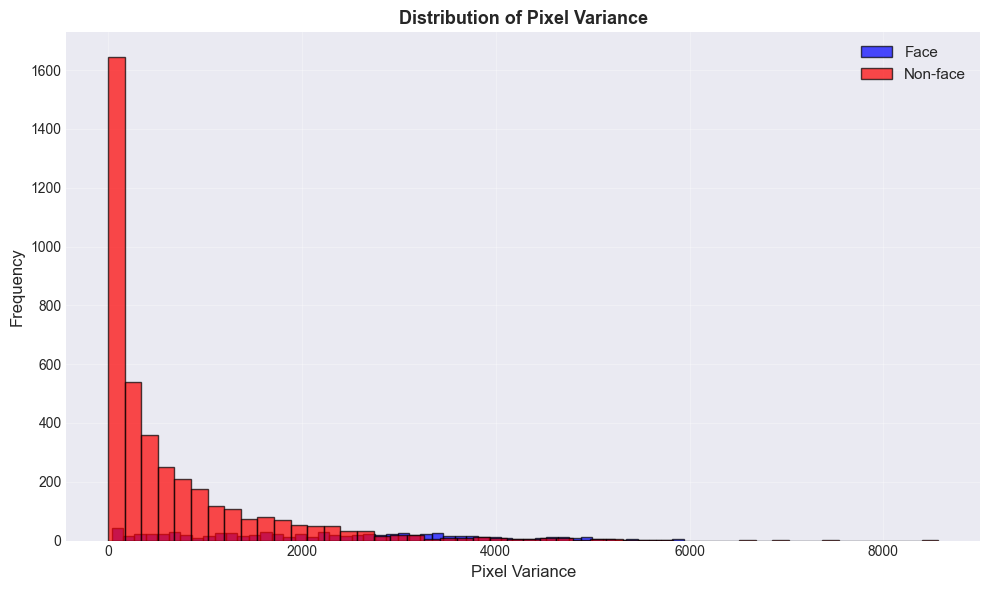

Face patches - Variance mean: 2303.79, std: 1452.88
Non-face patches - Variance mean: 634.08, std: 904.11


In [7]:
# Compute variance per patch
face_vars = train_faces.var(axis=(1, 2))
nonface_vars = train_nonfaces.var(axis=(1, 2))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(face_vars, bins=50, alpha=0.7, label='Face', color='blue', edgecolor='black')
ax.hist(nonface_vars, bins=50, alpha=0.7, label='Non-face', color='red', edgecolor='black')
ax.set_xlabel('Pixel Variance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Pixel Variance', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/variance_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Face patches - Variance mean: {face_vars.mean():.2f}, std: {face_vars.std():.2f}")
print(f"Non-face patches - Variance mean: {nonface_vars.mean():.2f}, std: {nonface_vars.std():.2f}")

## 6. Average Face Visualization

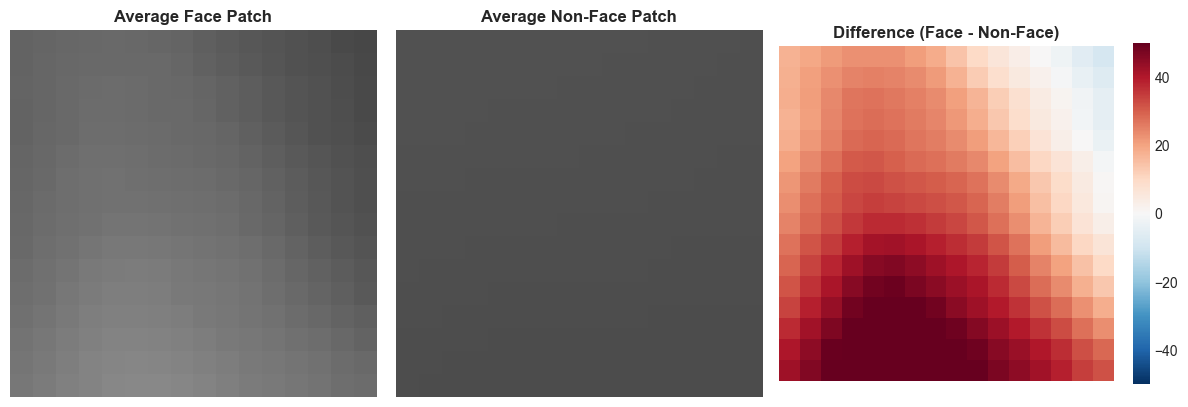

In [8]:
# Compute average face and non-face
avg_face = train_faces.mean(axis=0)
avg_nonface = train_nonfaces.mean(axis=0)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(avg_face, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Average Face Patch', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(avg_nonface, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Average Non-Face Patch', fontsize=12, fontweight='bold')
axes[1].axis('off')

# Difference
diff = avg_face - avg_nonface
im = axes[2].imshow(diff, cmap='RdBu_r', vmin=-50, vmax=50)
axes[2].set_title('Difference (Face - Non-Face)', fontsize=12, fontweight='bold')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046)

plt.tight_layout()
plt.savefig('../results/figures/average_patches.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Summary Statistics

In [9]:
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  Faces: {len(train_faces):,}")
print(f"  Non-faces: {len(train_nonfaces):,}")
print(f"  Total: {len(train_faces) + len(train_nonfaces):,}")
print(f"  Imbalance ratio: {len(train_nonfaces)/len(train_faces):.2f}:1")

print(f"\nTesting Set:")
print(f"  Faces: {len(test_faces):,}")
print(f"  Non-faces: {len(test_nonfaces):,}")
print(f"  Total: {len(test_faces) + len(test_nonfaces):,}")

print(f"\nPatch Properties:")
print(f"  Size: 16×16 pixels")
print(f"  Type: Grayscale (uint8)")
print(f"  Pixel range: [0, 255]")

print(f"\nIntensity Statistics:")
print(f"  Face mean: {face_means.mean():.2f} ± {face_means.std():.2f}")
print(f"  Non-face mean: {nonface_means.mean():.2f} ± {nonface_means.std():.2f}")

print(f"\nVariance Statistics:")
print(f"  Face variance: {face_vars.mean():.2f} ± {face_vars.std():.2f}")
print(f"  Non-face variance: {nonface_vars.mean():.2f} ± {nonface_vars.std():.2f}")

print("\n" + "=" * 60)
print("✓ Dataset is ready for Viola-Jones training!")
print("=" * 60)

DATASET SUMMARY

Training Set:
  Faces: 799
  Non-faces: 3,995
  Total: 4,794
  Imbalance ratio: 5.00:1

Testing Set:
  Faces: 2,260
  Non-faces: 11,300
  Total: 13,560

Patch Properties:
  Size: 16×16 pixels
  Type: Grayscale (uint8)
  Pixel range: [0, 255]

Intensity Statistics:
  Face mean: 106.41 ± 46.67
  Non-face mean: 78.63 ± 49.72

Variance Statistics:
  Face variance: 2303.79 ± 1452.88
  Non-face variance: 634.08 ± 904.11

✓ Dataset is ready for Viola-Jones training!


## Observations

1. **Class Imbalance**: ~5:1 ratio (non-face:face) which AdaBoost will handle via weight initialization
2. **Patch Quality**: Center face patches show clear facial features despite small 16×16 size
3. **Separability**: Some difference in intensity distributions suggests potential for discrimination
4. **Next Steps**: Implement integral image and Haar features for feature extraction